In [1]:
from os.path import join

import numpy as np
from numpy.linalg import svd, solve, eig
from scipy.io import loadmat

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [2]:
# VORTALL contains flow fields reshaped into column vectors
X = loadmat(join('..', 'DATA', 'VORTALL.mat'))['VORTALL']

In [3]:
def dmd(X, X_prime, r):
    """
    Dynamic Mode Decomposition.
    """
    # Step 1 - Reduced SVD of X 
    U, S, VT = svd(X, full_matrices=False)
    U, Σ, VT = U[:, :r], np.diag(S[:r]), VT[:r, :]
    V = VT.T
    
    # Step 2 - Reduced matrix Ã
    Ã = solve(Σ, (U.T @ X_prime @ V).T).T

    # Step 3 - Spectral decomposition of Ã
    Λ, W = eig(Ã)
    Λ = np.diag(Λ)

    # Step 4 - Reconstruction of high-dimension DMD modes
    Φ = X_prime @ solve(Σ, VT).T @ W

    α_1 = Σ @ VT[:, 0]
    b = solve(W @ Λ, α_1)
    
    return Φ, Λ, b

Φ, Λ, b = dmd(X[:, :-1], X[:, 1:], r=21)

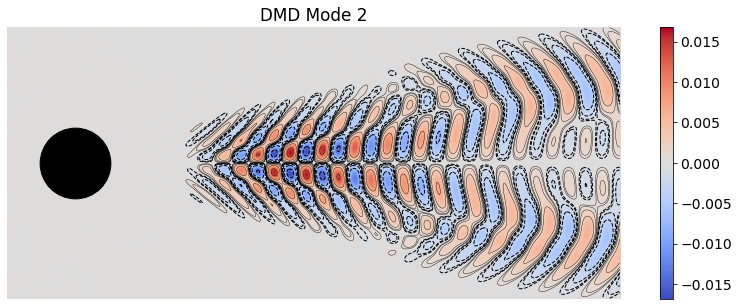

In [4]:
# Plot Mode 2
V2 = Φ[:, 1].reshape((449, 199)).T.real

fig, ax = plt.subplots(figsize=(14, 5))
vortmax = max(abs(V2.min()), abs(V2.max()))
img = ax.imshow(V2, cmap='coolwarm', vmin=-vortmax, vmax=vortmax)
ax.axis(False)

cvals = np.array([0.155, 0.25, 0.5, 1, 2, 4]) * vortmax / 5
ax.contour(V2, cvals, colors='black', linestyles='solid', linewidths=0.4)
ax.contour(V2, np.flip(-cvals), colors='black', linestyles='dashed', linewidths=1)

# Cylinder
ax.scatter(49, 99, 5000, color='black')
fig.colorbar(img)
ax.set_title('DMD Mode 2');

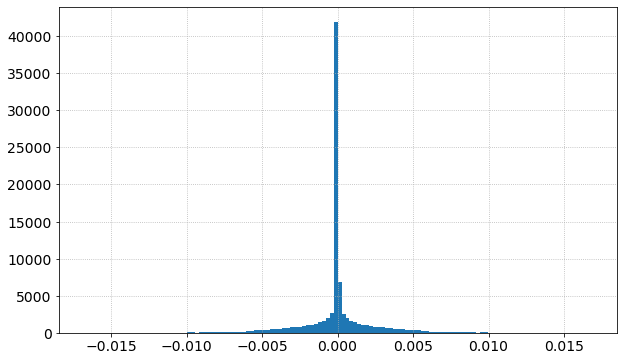

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(V2.flat, bins=128)
ax.grid(True, linestyle=':');